# Heart Disease Risk Analysis Using EDA and Machine Learning

## Step 1: Understanding the Data

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import shap


In [11]:
#data loading 
df = pd.read_csv(r'C:\Users\User\Downloads\HeartDiseaseTrain-Test.csv')

In [14]:
#exploring the dataset
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [16]:
df.rename(columns={'cholestoral': 'cholesterol'}, inplace=True)

In [18]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholesterol                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [20]:
# Summary statistics for numeric columns
df.describe()

,age,resting_blood_pressure,cholesterol,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [22]:
#identify missing data
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholesterol                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [24]:
#identify duplicates &  Check number of duplicates
df.duplicated().sum()  

723

In [26]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']


In [28]:
# Check which columns exist in the dataset
valid_categorical_cols = [col for col in categorical_cols if col in df.columns]
print("Valid columns for Label Encoding:", valid_categorical_cols)


Valid columns for Label Encoding: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']


In [30]:
# Apply Label Encoding to existing categorical columns
label_encoder = LabelEncoder()
for col in valid_categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [32]:
# Verify encoding
print(df.head())


   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2             168                        0   
1                    0         1             155                        1   
2                    1         2             125                        1   
3                    1         2             161                        0   
4                    0         2             106                        0   

   oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  target  
0      1.0      0                              3  

# Normalization


In [35]:
# Identify numerical columns (integers & floats) excluding the target
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('target')


In [37]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [39]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [41]:
# Display results
print(df_normalized.head())  # Normalized dataset


        age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0  0.479167    1                3                0.292453     0.196347   
1  0.500000    1                3                0.433962     0.175799   
2  0.854167    1                3                0.481132     0.109589   
3  0.666667    1                3                0.509434     0.175799   
4  0.687500    0                3                0.415094     0.383562   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2        0.740458                        0   
1                    0         1        0.641221                        1   
2                    1         2        0.412214                        1   
3                    1         2        0.687023                        0   
4                    0         2        0.267176                        0   

    oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  target  
0  0.161290      0 

# EXPLORATORY ANALYSIS


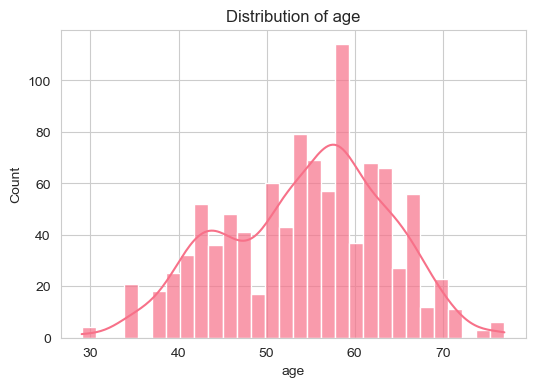

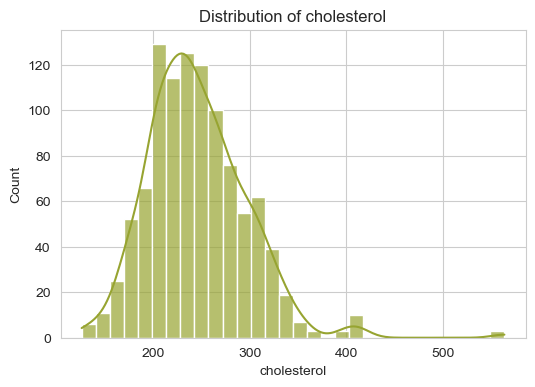

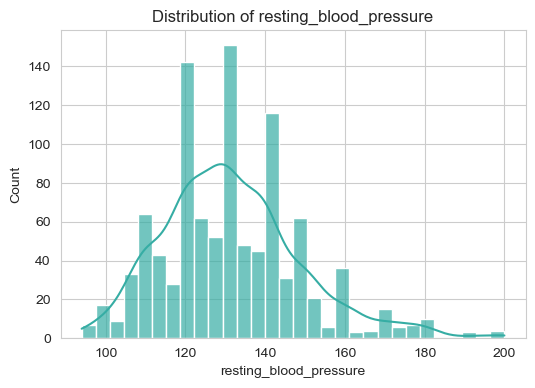

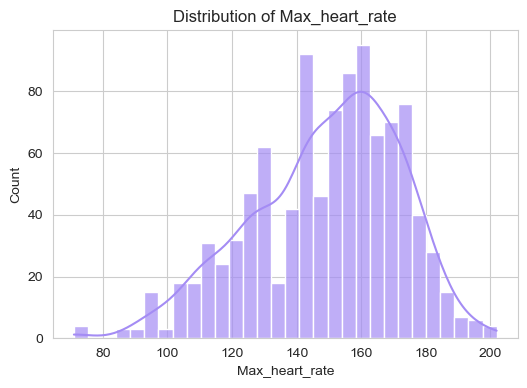

In [44]:
# Define numerical columns first
num_cols = ['age', 'cholesterol', 'resting_blood_pressure', 'Max_heart_rate']

# Generates unique colors
palette = sns.color_palette("husl", len(num_cols))

# Set a nice background
sns.set_style("whitegrid")

# Loop through numerical columns and plot distributions
for col, color in zip(num_cols, palette):
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=30, kde=True, color=color, alpha=0.7)
        plt.title(f"Distribution of {col}")
        plt.show()


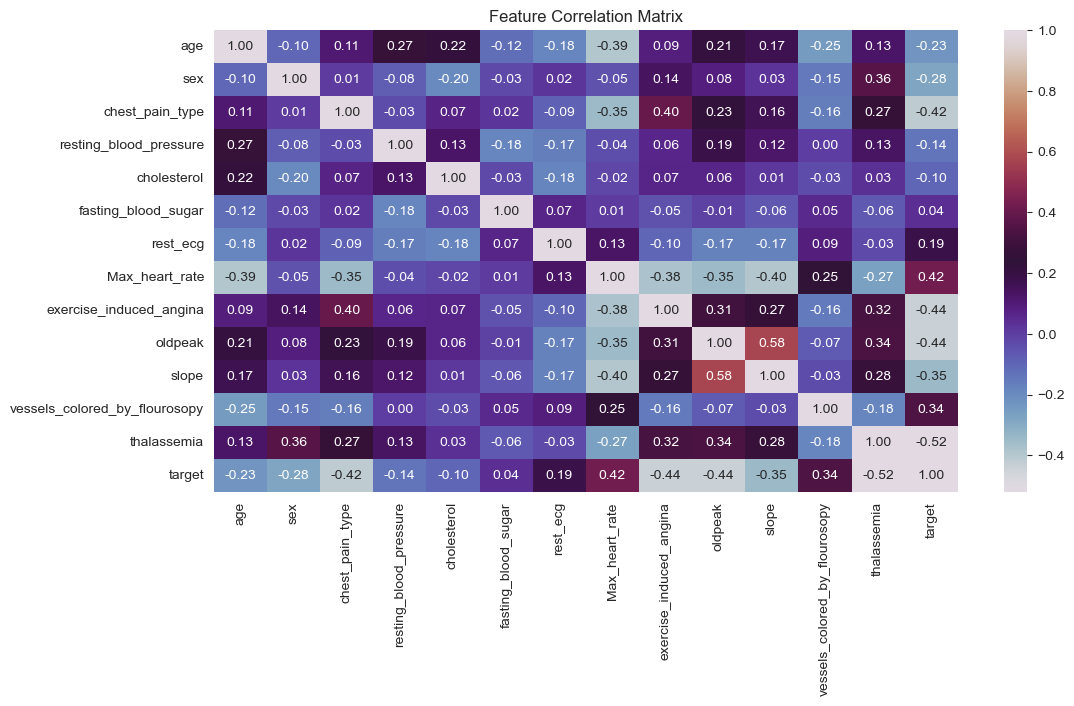

In [46]:
#Bivariate Analysis - Relationship with Heart Disease
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="twilight", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


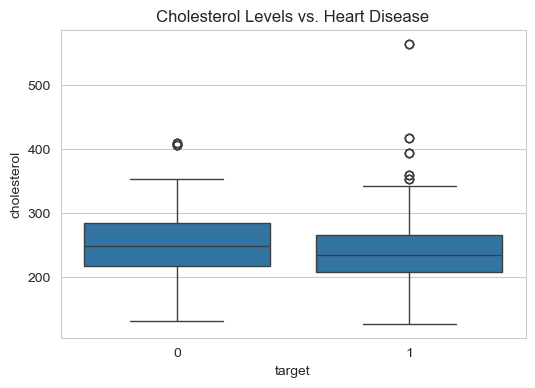

In [48]:
# Boxplot of cholesterol levels by heart disease status
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['target'], y=df['cholesterol'])
plt.title("Cholesterol Levels vs. Heart Disease")
plt.show()


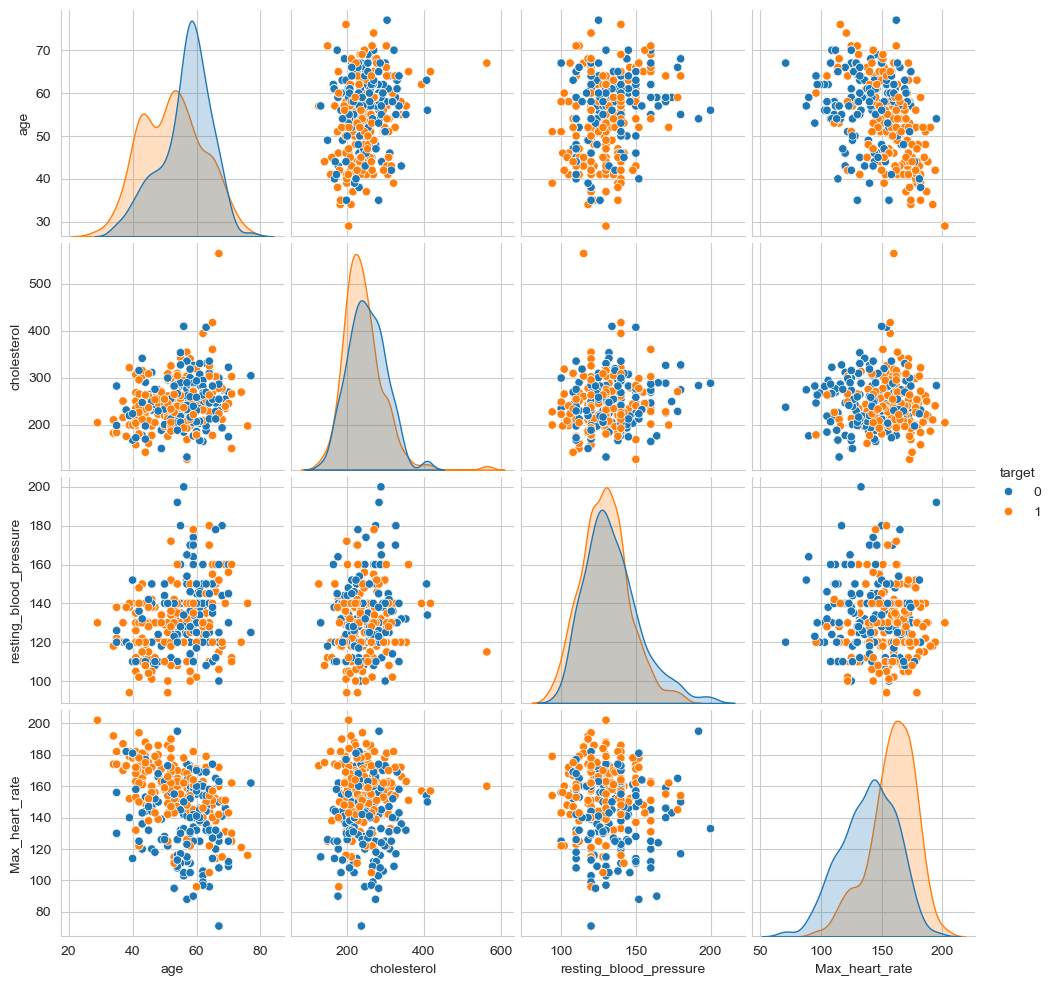

In [50]:
#  Multivariate Analysis - Pair Plot
sns.pairplot(df, hue="target", vars=['age', 'cholesterol', 'resting_blood_pressure', 'Max_heart_rate'])
plt.show()


# Hypothesis Testing 


# Test if Cholesterol Levels Differ Between Heart Disease and No Heart Disease Patients
## Hypothesis:

## Null (H₀): No difference in cholesterol levels between patients with and without heart disease.
## Alternative (H₁): Cholesterol levels significantly differ between the two groups.



In [53]:
# Step 1: Remove duplicate column (keep only one 'cholesterol')
df = df.loc[:, ~df.columns.duplicated()]

# Step 2: Ensure 'cholesterol' is a single column
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')

print("Successfully fixed 'cholesterol' column and converted to numeric.")


Successfully fixed 'cholesterol' column and converted to numeric.


In [56]:
# Grouping by heart disease presence
heart_disease = df[df['target'] == 1]['cholesterol']
no_heart_disease = df[df['target'] == 0]['cholesterol']

# Perform t-test
t_stat, p_value = ttest_ind(heart_disease, no_heart_disease, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Cholesterol levels are significantly different between groups.")
else:
    print("No significant difference in cholesterol levels.")


T-statistic: -3.219133918272536, P-value: 0.0013262409956772104
Cholesterol levels are significantly different between groups.


# Test if Sex is Associated with Heart Disease (Chi-Square Test)
## Hypothesis:

## H₀: Sex is not related to heart disease.
## H₁: Sex is significantly associated with heart disease.

In [59]:
# Creating a contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform Chi-Square Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")


if p_value < 0.05:
    print("Sex and heart disease are significantly associated.")
else:
    print("No significant association between sex and heart disease.")


Chi-Square Statistic: 78.86305133922973, P-value: 6.656820681726434e-19
Sex and heart disease are significantly associated.


# Test if Blood Pressure is Higher in Patients with Heart Disease
## Hypothesis:

## H₀: No difference in resting blood pressure between groups.
## H₁: Patients with heart disease have significantly higher blood pressure


In [62]:
# Grouping by heart disease presence
bp_heart_disease = df[df['target'] == 1]['resting_blood_pressure']
bp_no_heart_disease = df[df['target'] == 0]['resting_blood_pressure']

# Perform t-test
t_stat, p_value = ttest_ind(bp_heart_disease, bp_no_heart_disease, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


if p_value < 0.05:
    print("Blood pressure is significantly different in heart disease patients.")
else:
    print("No significant difference in blood pressure levels.")



T-statistic: -4.465214972380933, P-value: 8.922491860767991e-06
Blood pressure is significantly different in heart disease patients.


# Model Building 


In [65]:
#split data before training
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [67]:
#Standardize data (important for KNN & Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Train Models

In [70]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


In [72]:
#Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
     # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"🔹 {name} Performance:")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-score: {f1:.4f}")
    print("-" * 40)


🔹 Logistic Regression Performance:
   - Accuracy: 0.7951
   - Precision: 0.7699
   - Recall: 0.8447
   - F1-score: 0.8056
----------------------------------------
🔹 Decision Tree Performance:
   - Accuracy: 0.9854
   - Precision: 1.0000
   - Recall: 0.9709
   - F1-score: 0.9852
----------------------------------------
🔹 K-Nearest Neighbors Performance:
   - Accuracy: 0.8244
   - Precision: 0.7965
   - Recall: 0.8738
   - F1-score: 0.8333
----------------------------------------


# Hyperparameter Tuning 

## Decision Tree Hyperparameter Tuning
### max_depth (controls the depth of the tree)
### min_samples_split (minimum samples needed to split a node)
### min_samples_leaf (minimum samples in a leaf)


In [76]:
# Define hyperparameter grids
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


## KNN Hyperparameter Tuning
### n_neighbors (number of nearest neighbors)
### weights (uniform vs. distance)
### metric (euclidean, manhattan)

In [79]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [81]:
# Initialize models
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()


In [83]:
# Grid search with cross-validation
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)


In [85]:
# Fit models
dt_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [86]:
# Best models
best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_


In [87]:
# Print best parameters
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best KNN Parameters:", knn_grid.best_params_)

Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


## Evaluate Tuned Models
####  let's train the optimized models and compare their accuracy, precision, recall, and F1-score.

In [92]:
# Train optimized Decision Tree
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

In [94]:
# Train optimized KNN
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

In [96]:
# Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"🔹 {model_name} Performance:")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-score: {f1:.4f}")
    print("-" * 40)


In [98]:
# Evaluate models
evaluate_model(y_test, y_pred_dt, "Tuned Decision Tree")
evaluate_model(y_test, y_pred_knn, "Tuned KNN")

🔹 Tuned Decision Tree Performance:
   - Accuracy: 0.9854
   - Precision: 1.0000
   - Recall: 0.9709
   - F1-score: 0.9852
----------------------------------------
🔹 Tuned KNN Performance:
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-score: 1.0000
----------------------------------------


## Cross-Validation
#### Instead of relying only on one train-test split, let’s use Stratified K-Fold Cross-Validation to ensure stable results.



In [101]:
# 10-fold Cross-validation
cv_scores_dt = cross_val_score(best_dt, X, y, cv=10, scoring='accuracy')
cv_scores_knn = cross_val_score(best_knn, X, y, cv=10, scoring='accuracy')

print(f"🔹 Decision Tree Cross-Validation Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")
print(f"🔹 KNN Cross-Validation Accuracy: {cv_scores_knn.mean():.4f} ± {cv_scores_knn.std():.4f}")


🔹 Decision Tree Cross-Validation Accuracy: 0.9912 ± 0.0134
🔹 KNN Cross-Validation Accuracy: 0.9942 ± 0.0117


## Check for Data Leakage
###### Feature Importance (Decision Tree)
###### If some features have extremely high importance, they might be leaking target information.

In [104]:
# Get feature importances
feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)


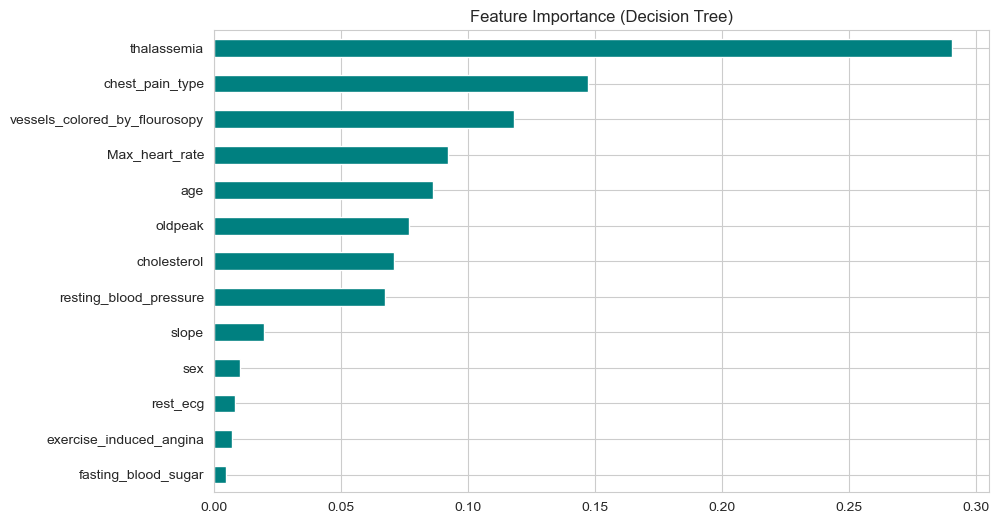

In [106]:
# Plot
plt.figure(figsize=(10, 6))
feat_importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance (Decision Tree)")
plt.show()

 # Objective of SHAP Analysis
## Identify which features (like age, cholesterol, blood pressure, etc.) most influence the model's prediction.
## Determine whether features increase or decrease heart disease risk.
## Provide interpretable insights to make the model's decision-making transparent.

In [109]:
#Train a Machine Learning Model
#Before applying SHAP, ensure that the KNN classifier is properly trained:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [111]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [199]:

feature_names = [ 'cholesterol','age']


## Define the SHAP Explainer
### SHAP has different explainers, but since KNN doesn’t have a direct SHAP integration, we use KernelExplainer:

In [116]:
# Select a small subset of training data for efficient computation
sample_data = X_train[:100]

# Define SHAP Explainer
explainer = shap.KernelExplainer(knn.predict_proba, sample_data)

In [173]:
# Generate SHAP values for a test sample
shap_values = explainer.shap_values(X_test)  


  0%|          | 0/205 [00:00<?, ?it/s]

In [175]:
# Check if SHAP values are in multi-class format (list of arrays)
if isinstance(shap_values, list) and len(shap_values) > 1:
    class_index = 1  
    shap_values = shap_values[class_index] 
# Print shape for verification
print("SHAP values shape after fix:", len(shap_values), len(shap_values[0]))


SHAP values shape after fix: 205 13


In [177]:
# Print shape for verification
print("SHAP values shape after fix:", len(shap_values), len(shap_values[0]))



SHAP values shape after fix: 205 13


Fixed SHAP values shape: (205, 13)


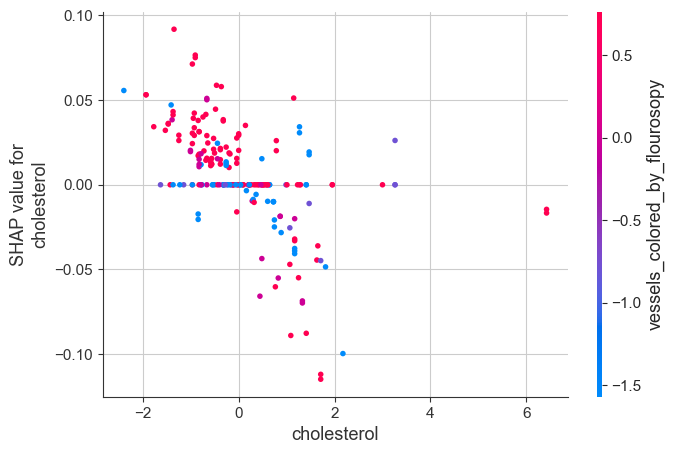

In [179]:
# Select SHAP values for one class 
shap_values_class1 = shap_values[:, :, 1]  

print("Fixed SHAP values shape:", shap_values_class1.shape)  

#  plot
shap.dependence_plot("cholesterol", shap_values_class1, X_test, feature_names=feature_names)

<Figure size 640x480 with 0 Axes>

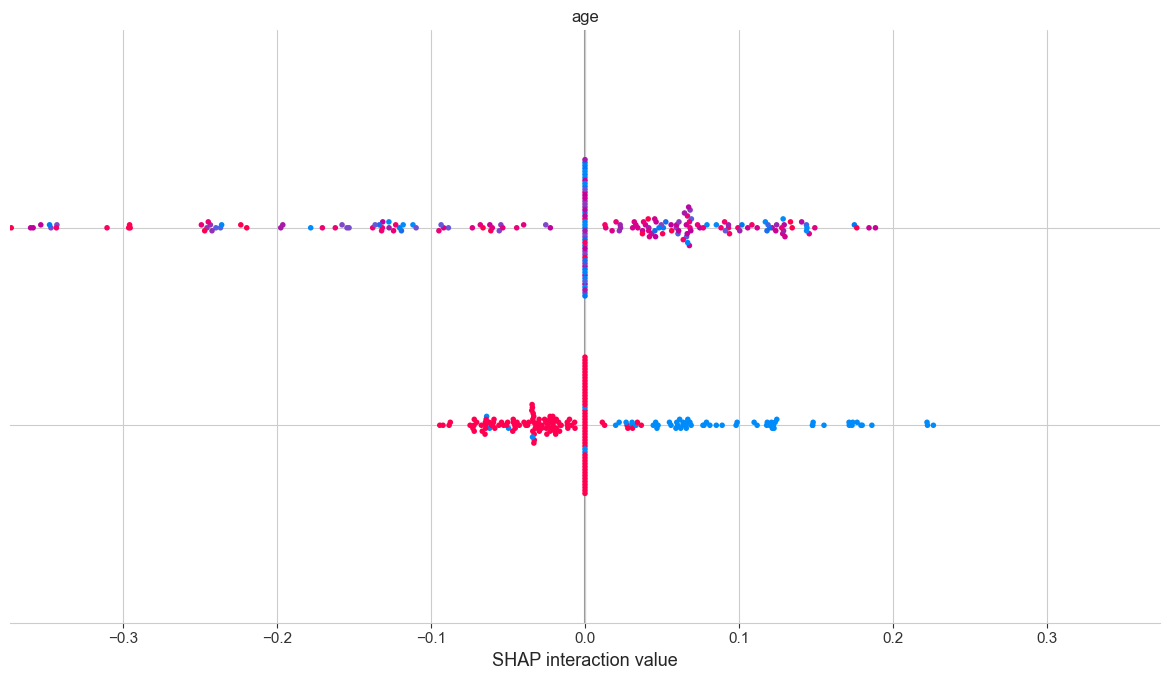

In [201]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Heart Disease Risk Analysis
## The project's objective was to analyze key heart disease risk factors using a machine learning model. The dataset used is the UCI Heart Disease Dataset, which contains key health indicators such as cholesterol levels, blood pressure, and age. The workflow consists of the following steps. 

### 1. **Data Preprocessing**: Handling missing values, feature scaling, and encoding categorical variables.
### 2. **Exploratory Data Analysis (EDA)**: Understanding feature distributions, correlations, and key risk indicators.
### 3. **Model Training & Evaluation**: Training multiple machine learning models, selecting the best-performing one using metrics like accuracy, precision, and recall.
### 4. **Feature Importance Analysis**: Using SHAP  to interpret the model's predictions and understand which features contribute most to heart disease risk.
### 5. **Visualization & Insights**: Generating SHAP plots and other visualizations to make the results interpretable.

#### This analysis helps in understanding the most critical factors influencing heart disease, providing a foundation for further healthcare-related predictive modeling and decision-making.